<hr size="5"/>

# Exploratory Data Analysis - Phase I
**Team Members:** Leonid Shpaner, Christopher Robinson, and Jose Luis Estrada

<hr size="5"/>
This notebook looks at the data from a preliminary assessment (encoding data types, null values, and plotting some basic bar graphs).

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
%cd /content/drive/Shared drives/Capstone - Best Group/GitHub Repository/navigating_crime/Code Library

/content/drive/Shared drives/Capstone - Best Group/GitHub Repository/navigating_crime/Code Library


In [3]:
####################################
## import the requisite libraries ##
####################################
import os
import csv
import pandas as pd 

import matplotlib.pyplot as plt # for making plots

from tabulate import tabulate # for making tables

# import library for suppressing warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# check current working directory
current_directory= os.getcwd()
current_directory

'/content/drive/Shared drives/Capstone - Best Group/GitHub Repository/navigating_crime/Code Library'

In [5]:
# path to the data file
data_file = '/content/drive/Shareddrives/Capstone - Best Group/' \
          + 'Final_Data_20220719/LA_Streets_with_Crimes_By_Division.csv'

# path to data folder
data_folder = '/content/drive/Shareddrives/Capstone - Best Group/' \
            + '/GitHub Repository/navigating_crime/Data Folder/'

# path to the image library
eda_image_path = '/content/drive/Shareddrives/Capstone - Best Group/' \
               + '/GitHub Repository/navigating_crime/Image Folder/EDA Images'

In [6]:
# read in the csv file to a dataframe using pandas
df = pd.read_csv(data_file, low_memory=False)
df.head()

,OBJECTID,Shape,Join_Count,TARGET_FID,Join_Count_1,TARGET_FID_1,JOIN_FID,FullName,Type,Elevation,...,LAT,LON,OBJECTID_1,APREC,PREC,AREA_1,PERIMETER,SHAPE_Leng,Shape_Length_1,Shape_Length
0,18,"(-13168057.17375, 3992141.1804500036)",1,18,1,18,-1,NaN,Alley,Unknown,...,33.7261,-118.2907,20.0,HARBOR,5.0,8.928780e+08,272451.139908,0.807721,0.807721,120.220887
1,36,"(-13180677.51995, 4031566.0669)",1,36,1,36,-1,NaN,Secondary,Surface,...,34.0205,-118.4040,17.0,PACIFIC,14.0,7.176129e+08,246934.321606,0.757182,0.757182,15.473452
2,37,"(-13180677.51995, 4031566.0669)",1,36,1,37,-1,NaN,Secondary,Surface,...,34.0205,-118.4040,17.0,PACIFIC,14.0,7.176129e+08,246934.321606,0.757182,0.757182,15.473452
3,44,"(-13160890.369035002, 4035687.0216437643)",1,43,1,44,-1,NaN,Minor,Surface,...,34.0509,-118.2265,11.0,HOLLENBECK,4.0,4.330323e+08,111317.952873,0.329096,0.329096,118.766240
4,56,"(-13165346.8195, 4030644.1469999994)",1,55,1,56,-1,NaN,Secondary,Surface,...,34.0138,-118.2663,16.0,NEWTON,13.0,2.723760e+08,81476.922847,0.241128,0.241128,9.731604


## Data Report

The data report is a first pass overview of unique IDs, zip code columns, and data types in the entire data frame. Since this function will not be re-used, it is defined and passed in only once for this first attempt in exploratory data analysis. 

In [7]:
def build_report(df):
    '''
    This function provides a comprehensive report of all ID columns, all 
    data types on every column in the dataframe, showing column names, column 
    data types, number of nulls, and percentage of nulls, respectively.
    Inputs:
        df: dataframe to run the function on
    Outputs:
        dat_type: report showing column name, data type, count of null values
                  in the dataframe, and percentage of null values in the 
                  dataframe
        report: final report as a dataframe that can be saved out to .txt file
                or .rtf file, respectively.
    '''
    # create an empty log container for appending to output dataframe 
    log_txt = []

    print(' ')
    # append header to log_txt container defined above
    log_txt.append(' ')

    print('File Contents')
    log_txt.append('File Contents')

    print(' ')
    log_txt.append(' ')
    
    print('No. of Rows in File: ' + str(f"{df.shape[0]:,}"))
    log_txt.append('No. of Rows in File: ' + str(f"{df.shape[0]:,}"))

    print('No. of Columns in File: ' + str(f"{df.shape[1]:,}"))
    log_txt.append('No. of Columns in File: ' + str(f"{df.shape[1]:,}"))
    
    print(' ')
    log_txt.append(' ')

    print('ID Column Information')
    log_txt.append('ID Column Information')

    # filter out any columns contain the 'ID' string
    id_col = df.filter(like='ID').columns
    # if there are any columns that contain the '_id' string in df
    # print the number of unique columns and get a distinct count
    # otherwise, report that these Ids do not exist.

    if df[id_col].columns.any():
        df_print = df[id_col].nunique().apply(lambda x : "{:,}".format(x))
        df_print = pd.DataFrame(df_print)
        df_print.reset_index(inplace=True)
        df_print = df_print.rename(columns={0: 'Distinct Count',
                                               'index':'ID Columns'})
        # encapsulate this distinct count within a table
        df_tab = tabulate(df_print, headers='keys', tablefmt='psql')
        print(df_tab)
        log_txt.append(df_tab)
    else:
        df_notab = 'Street IDs DO NOT exist.'
        print(df_notab)
        log_txt.append(df_notab)
    
    print(' ')
    log_txt.append(' ')

    print('Zip Code Column Information')
    log_txt.append('Zip Code Column Information')

    # filter out any columns contain the 'Zip' string
    zip_col = df.filter(like='Zip').columns
    # if there are any columns that contain the 'Zip' string in df
    # print the number of unique columns and get a distinct count
    # otherwise, report that these Ids do not exist.

    if df[zip_col].columns.any():
        df_print = df[zip_col].nunique().apply(lambda x : "{:,}".format(x))
        df_print = pd.DataFrame(df_print)
        df_print.reset_index(inplace=True)
        df_print = df_print.rename(columns={0: 'Distinct Count',
                                               'index':'ID Columns'})
        # encapsulate this distinct count within a table
        df_tab = tabulate(df_print, headers='keys', tablefmt='psql')
        print(df_tab)
        log_txt.append(df_tab)
    else:
        df_notab = 'Street IDs DO NOT exist.'
        print(df_notab)
        log_txt.append(df_notab)

    print(' ')
    log_txt.append(' ')

    print('Date Column Information')
    log_txt.append('Date Column Information')

    # filter out any columns contain the 'Zip' string
    date_col = df.filter(like='Date').columns
    # if there are any columns that contain the 'Zip' string in df
    # print the number of unique columns and get a distinct count
    # otherwise, report that these Ids do not exist.

    if df[date_col].columns.any():
        df_print = df[date_col].nunique().apply(lambda x : "{:,}".format(x))
        df_print = pd.DataFrame(df_print)
        df_print.reset_index(inplace=True)
        df_print = df_print.rename(columns={0: 'Distinct Count',
                                               'index':'ID Columns'})
        # encapsulate this distinct count within a table
        df_tab = tabulate(df_print, headers='keys', tablefmt='psql')
        print(df_tab)
        log_txt.append(df_tab)
    else:
        df_notab = 'Street IDs DO NOT exist.'
        print(df_notab)
        log_txt.append(df_notab)

    print(' ')
    log_txt.append(' ')

    print('Column Data Types and Their Respective Null Counts')
    log_txt.append('Column Data Types and Their Respective Null Counts')

    # Features' Data Types and Their Respective Null Counts
    dat_type = df.dtypes

    # create a new dataframe to inspect data types
    dat_type = pd.DataFrame(dat_type)

    # sum the number of nulls per column in df
    dat_type['Null_Values'] = df.isnull().sum()

    # reset index w/ inplace = True for more efficient memory usage
    dat_type.reset_index(inplace=True)

    # percentage of null values is produced and cast to new variable
    dat_type['perc_null'] = round(dat_type['Null_Values'] / len(df)*100,0)
    
    # columns are renamed for a cleaner appearance
    dat_type = dat_type.rename(columns={0:'Data Type',
                                          'index': 'Column/Variable',
                                          'Null_Values': '# of Nulls',
                                          'perc_null': 'Percent Null'})

    # sort null values in descending order
    data_types = dat_type.sort_values(by=['# of Nulls'], ascending=False)
    
    # output data types (show the output for it)
    data_types = tabulate(data_types, headers='keys', tablefmt='psql')
    print(data_types)
    
    log_txt.append(data_types)
    report = pd.DataFrame({'LA City Walking Streets With Crimes Data Report'
                          :log_txt})
    return dat_type, report

In [8]:
# pass the build_report function to a new variable named report
data_report = build_report(df)

## DEFINING WHAT GETS SENT OUT

# save report to .txt file
data_report[1].to_csv(data_folder + '/Reports/data_report.txt', 
              index=False, sep="\t",
              quoting=csv.QUOTE_NONE, quotechar='', escapechar='\t')

# # save report to .rtf file
data_report[1].to_csv(data_folder +'/Reports/data_report.rtf', 
              index=False, sep="\t",
              quoting=csv.QUOTE_NONE, quotechar='', escapechar='\t')

 
File Contents
 
No. of Rows in File: 183,362
No. of Columns in File: 81
 
ID Column Information
+----+--------------+------------------+
|    | ID Columns   | Distinct Count   |
|----+--------------+------------------|
|  0 | OBJECTID     | 183,362          |
|  1 | TARGET_FID   | 36,969           |
|  2 | TARGET_FID_1 | 183,362          |
|  3 | JOIN_FID     | 490              |
|  4 | SourceID     | 36,593           |
|  5 | StreetOID    | 36,969           |
|  6 | OBJECTID_1   | 21               |
+----+--------------+------------------+
 
Zip Code Column Information
+----+--------------+------------------+
|    | ID Columns   |   Distinct Count |
|----+--------------+------------------|
|  0 | Zip_L        |              134 |
|  1 | Zip_R        |              135 |
+----+--------------+------------------+
 
Date Column Information
+----+--------------+------------------+
|    | ID Columns   |   Distinct Count |
|----+--------------+------------------|
|  0 | UpdateDate   |     

In [9]:
# access data types from build_report() function
data_types = data_report[0]

# store data types in a .txt file in working directory for later use/retrieval
data_types.to_csv(data_folder + 'data_types.csv', index=False)
# subset of only numeric features
data_subset_num = data_types[(data_types['Data Type']=='float64') | \
                             (data_types['Data Type']=='int64')]

# subset of only rows that are fully null
data_subset_100 = data_types[data_types['Percent Null'] == 100]
# list these rows
data_subset_100 = data_subset_100['Column/Variable'].to_list()
print('The following columns contain all null rows:', data_subset_100, '\n')

# subsetting dataframe based on values that are not 100% null
data_subset = data_subset_num[data_subset_num['Percent Null'] < 100]

# list these rows
data_subset = data_subset['Column/Variable'].to_list()
df_subset = df[data_subset]

# dropping columns from this dataframe subset, such that the histogram
# that will be plotted below does not show target column(s)
df_crime_subset = df_subset.drop(columns=['Crm_Cd', 'Crm_Cd_1', 'Crm_Cd_2'])
# print columns of dataframe subset
print('The following columns remain in the subset:', '\n')
df_subset.columns

The following columns contain all null rows: ['StPreMod', 'StPostDir', 'StPostMod', 'MSAG_LCity', 'MSAG_RCity', 'MSAG_LESN', 'MSAG_RESN', 'Crm_Cd_4'] 

The following columns remain in the subset: 



Index(['OBJECTID', 'Join_Count', 'TARGET_FID', 'Join_Count_1', 'TARGET_FID_1',
       'JOIN_FID', 'From_L', 'From_R', 'To_L', 'To_R', 'Zip_L', 'Zip_R',
       'Accuracy', 'Crime_Cost', 'StreetOID', 'Field1', 'DR_NO', 'TIME_OCC',
       'AREA', 'Rpt_Dist_No', 'Part_1_2', 'Crm_Cd', 'Vict_Age', 'Premis_Cd',
       'Weapon_Used_Cd', 'Crm_Cd_1', 'Crm_Cd_2', 'Crm_Cd_3', 'LAT', 'LON',
       'OBJECTID_1', 'PREC', 'AREA_1', 'PERIMETER', 'SHAPE_Leng',
       'Shape_Length_1', 'Shape_Length'],
      dtype='object')

## Plots

### Histogram Distributions

Histogram distributions are plotted for the entire dataframe where numeric features exist. Axes labels are not passed in, since the `df.hist()` function is a first pass effort to elucidate the shape of each feature from a visual standpoint alone. Further analysis for features of interest provides more detail.

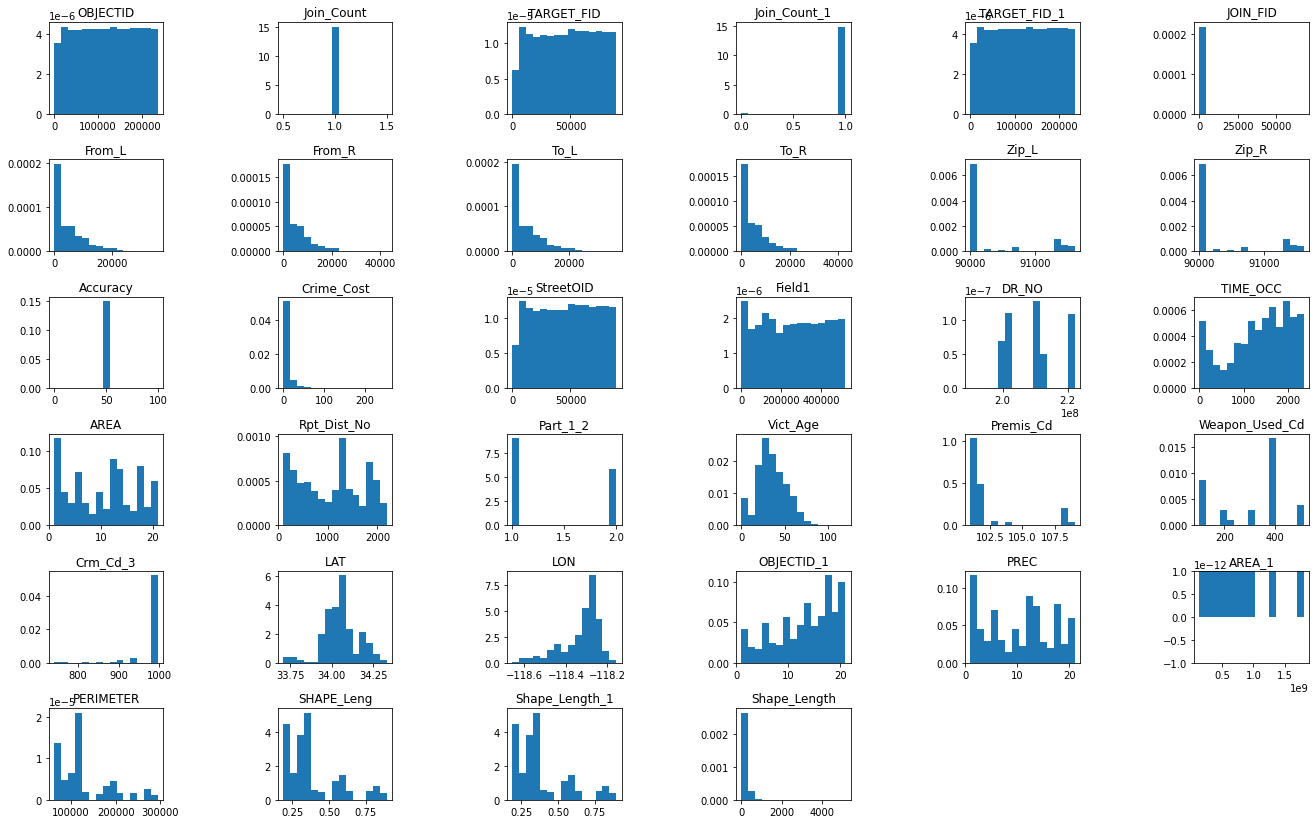

In [10]:
# create histograms for development data to inspect distributions
fig1 = df_crime_subset.hist(figsize=(25,12), grid=False, density=True, bins=15)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.8, 
                    top=1, wspace=1.0, hspace=0.5)
plt.savefig(eda_image_path + '/histogram.png', bbox_inches='tight')
plt.show()

### Boxplot Distributions

Inpsecting boxplots of various columns of interest can help shed more light on their respective distributions. A pre-defined plotting function is called from the `functions.py` library to carry this out.

In [11]:
# import boxplot function
from functions import sns_boxplot


Summarizing Vict_Age
The first quartile is 24.0. 
The third quartile is 46.0. 
The IQR is 22.0.
The mean is 34.51.
The standard deviation is 16.86.
The median is 33.0.
The distribution is positively skewed.


Summarizing Weapon_Used_Cd
The first quartile is 200.0. 
The third quartile is 400.0. 
The IQR is 200.0.
The mean is 311.94.
The standard deviation is 137.9.
The median is 400.0.
The distribution is negatively skewed.


Summarizing AREA
The first quartile is 4.0. 
The third quartile is 15.0. 
The IQR is 11.0.
The mean is 10.27.
The standard deviation is 6.26.
The median is 12.0.
The distribution is negatively skewed.



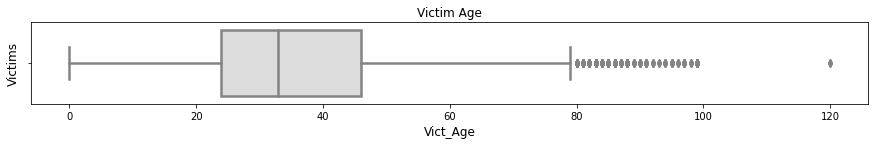

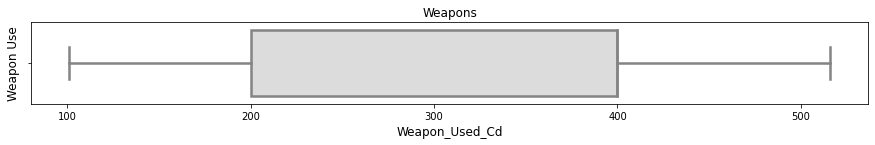

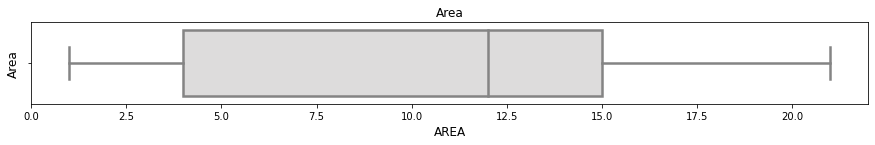

In [12]:
sns_boxplot(df, 'Victim Age', 'Victim Age', 'Victims', 'Vict_Age')
plt.savefig(eda_image_path + '/boxplot1.png', bbox_inches='tight')

sns_boxplot(df, 'Weapons', 'Weapons', 'Weapon Use', 'Weapon_Used_Cd')
plt.savefig(eda_image_path + '/boxplot2.png', bbox_inches='tight')

sns_boxplot(df, 'Area', 'Area', 'Area', 'AREA')
plt.savefig(eda_image_path + '/boxplot3.png', bbox_inches='tight')

### Bar Graphs

Generating bar graphs for columns of interest provides a visual context to numbers of occurrences for each respective scenario. A pre-defined plotting  function is called from the `functions.py` library to carry this out.

In [13]:
from functions import bar_plot

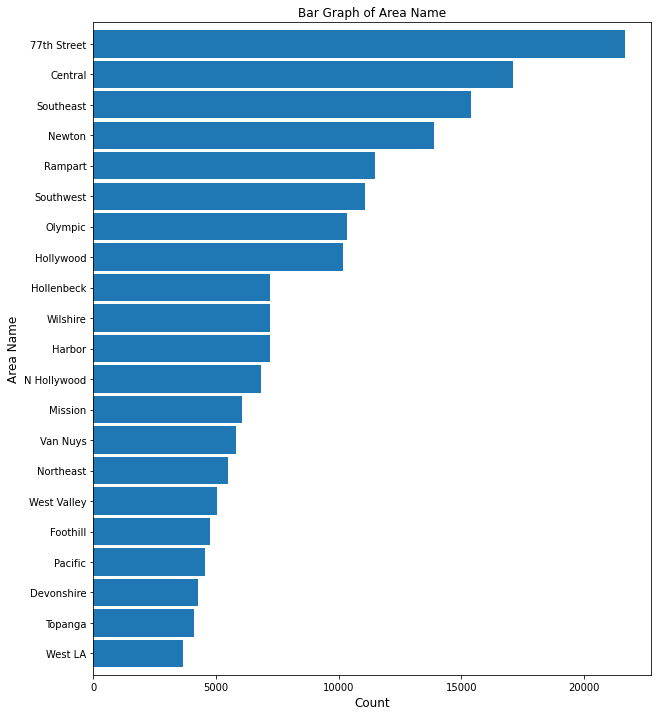

In [14]:
# plotting bar graph of area name
bar_plot(10, 12, df, True, 'barh', 'Bar Graph of Area Name', 0, 'Count', 
         'Area Name', 'AREA_NAME', 100)
plt.savefig(eda_image_path + '/area_name_bargraph.png', bbox_inches='tight')

This bar graph shows a steady drop off in crime for the top 100 area neighborhoods in Los Angeles. West LA boasts the lowest crime rate, whereas 77th Street shows the highest.

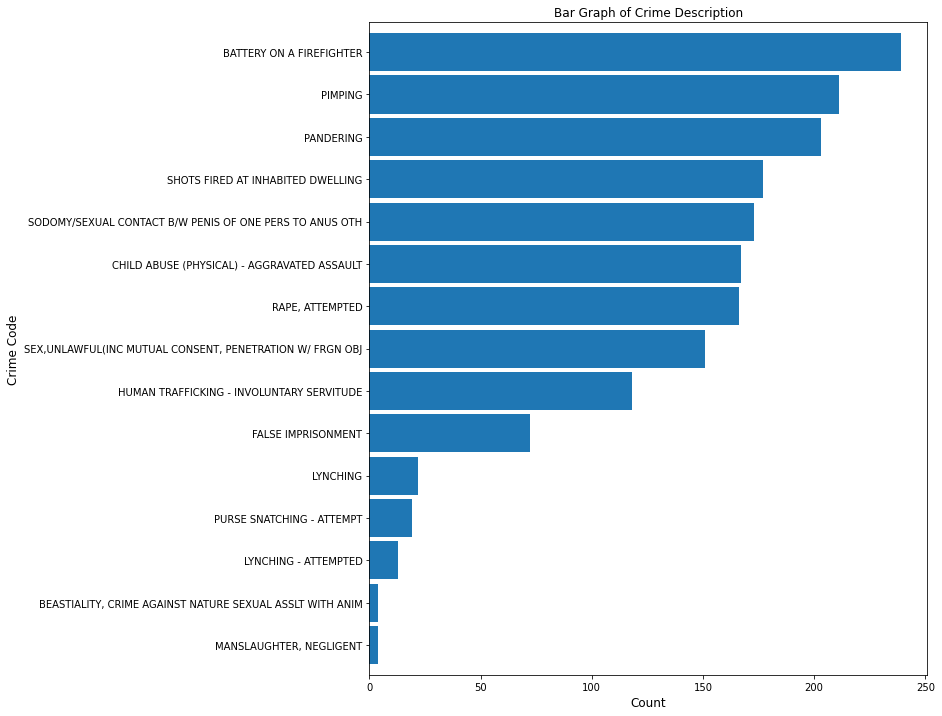

In [15]:
# plotting bar graph of crime description
bar_plot(10, 12, df, True, 'barh', 'Bar Graph of Crime Description', 0, 'Count', 
         'Crime Code', 'Crm_Cd_Desc', 15)
plt.savefig(eda_image_path + '/crime_desc_bargraph.png', bbox_inches='tight')

Among the top 15 crimes are battery on a firefighter (over 200), and negligent manslaughter (less than 50). 

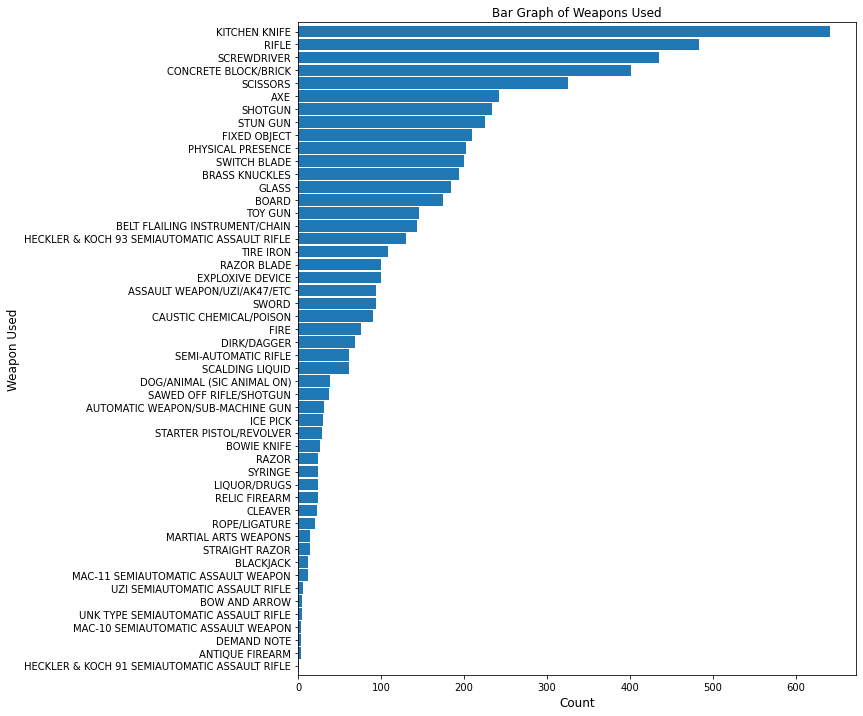

In [16]:
# plotting bar graph of weapons used
bar_plot(10, 12, df, True, 'barh', 'Bar Graph of Weapons Used', 0, 'Count', 
         'Weapon Used', 'Weapon_Desc', 50)
plt.savefig(eda_image_path + '/weapon_used_bargraph.png', bbox_inches='tight')

Among weapons used, the kitchen knife is presented over 600 times, whereas demand notes are among the rarest weapons in this dataset.

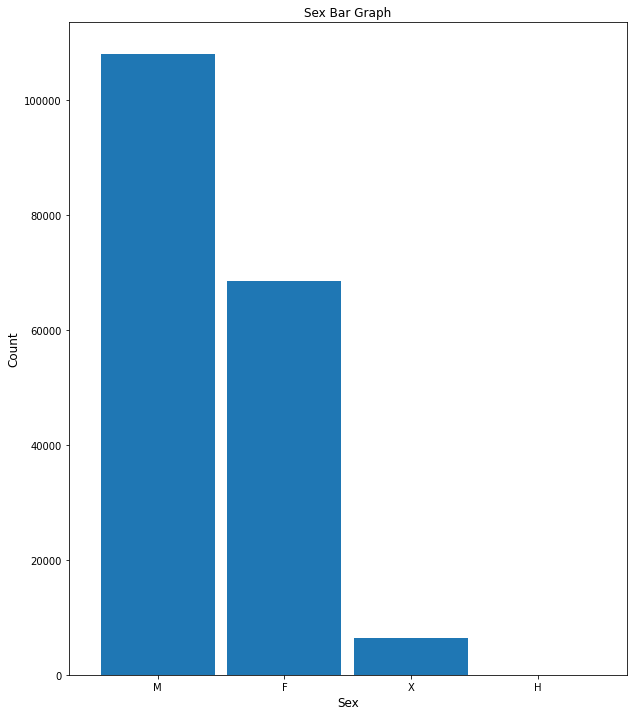

In [17]:
# plotting sex bar graph
bar_plot(10, 12, df, False, 'bar', 'Sex Bar Graph', 0, 'Sex', 'Count', 
         'Vict_Sex', 100)
plt.savefig(eda_image_path + '/sex_bargraph.png', bbox_inches='tight')

There are more males (over 100,000) than females (~70,000) in this dataset. There are less than 10,000 unknown sexes.

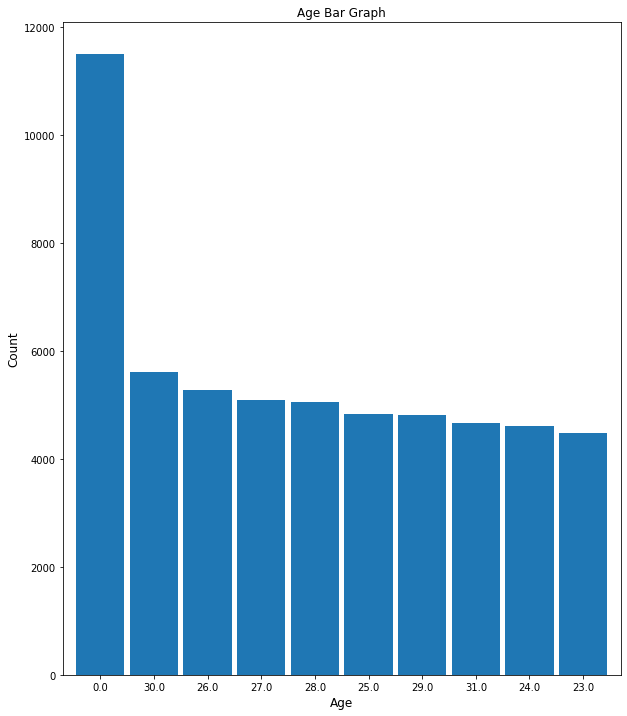

In [18]:
# plotting top ten victim ages
bar_plot(10, 12, df, False, 'bar', 'Age Bar Graph', 0, 'Age', 'Count', 
         'Vict_Age', 10)
plt.savefig(eda_image_path + '/age_bargraph.png', bbox_inches='tight')

Top 10 ages in this dataset range beween 0-30 years old.